In [24]:
import os
import sys

import numpy as np
import pandas as pd
import json
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

from wordcloud import WordCloud
from nltk.corpus import stopwords

STOP_WORDS = set(stopwords.words('english'))
SEED = 2022

In [25]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(12.0,8.0),
                   title: str = None, title_size: int = 24):

    wordcloud = WordCloud(background_color='black',
                          stopwords=STOP_WORDS,
                          max_words=max_words,
                          max_font_size=max_font_size,
                          random_state=SEED,
                          width=1200,
                          height=600,
                          mask=mask)

    wordcloud.generate(str(text))

    plt.figure(figsize=figure_size)

    plt.imshow(wordcloud)
    plt.title(title, fontdict={'size': title_size, 'color': 'black',
                              'verticalalignment': 'bottom'})
    plt.axis('off')
    plt.tight_layout()

In [26]:
fpath = r'C:\ProjectX\workspace\data\data_providers\gdelt\scraped_news\usa-news-annotated.jsonl'
df = pd.read_json(fpath, lines=True, encoding='utf-16')
df.head()

,text,_input_hash,_task_hash,spans,meta,options,accept,_view_id,config,answer,_timestamp
0,"By Jennifer De Pinto, Fred Backus, Anthony Sal...",1998789611,-135893388,"[{'text': 'gun', 'start': 485, 'end': 488, 'pa...","{'pattern': '61, 61, 61, 61, 61, 57, 61, 61, 6...","[{'id': 'HARASSMENT', 'text': 'HARASSMENT'}, {...",[],choice,{'choice_style': 'multiple'},accept,1666862735
1,The epic decision by the US Supreme Court decl...,-1364136101,-553694219,"[{'text': 'gun', 'start': 234, 'end': 237, 'pa...","{'pattern': '61, 61, 61'}","[{'id': 'HARASSMENT', 'text': 'HARASSMENT'}, {...",[],choice,{'choice_style': 'multiple'},accept,1666862983
2,"Governor Kathy Hochul has called for an ""extra...",1645904776,555948591,"[{'text': 'gun', 'start': 88, 'end': 91, 'patt...","{'pattern': '61, 58, 61, 60, 61, 60, 60, 58, 5...","[{'id': 'HARASSMENT', 'text': 'HARASSMENT'}, {...",[],choice,{'choice_style': 'multiple'},accept,1666863272
3,"CHARLESTON, W.Va. (WV News) -- West Virginia l...",-616248505,-97240494,"[{'text': 'obscene', 'start': 3021, 'end': 302...",{'pattern': '21'},"[{'id': 'HARASSMENT', 'text': 'HARASSMENT'}, {...",[],choice,{'choice_style': 'multiple'},accept,1666863386
4,"""For the first time now, in this pandemic, nea...",2145160317,1081617857,"[{'text': 'threat', 'start': 1362, 'end': 1368...",{'pattern': '9'},"[{'id': 'HARASSMENT', 'text': 'HARASSMENT'}, {...",[],choice,{'choice_style': 'multiple'},accept,1666863439


In [27]:
df.shape

(608, 11)

In [14]:
df[df.duplicated(subset='text', keep=False)].sort_values(by='text')

,text,_input_hash,_task_hash,spans,meta,options,accept,_view_id,config,answer,_timestamp
10,"(NEW YORK) -- Kaitlin Armstrong, a fugitive wa...",-2010229279,-591523239,"[{'text': 'murder', 'start': 58, 'end': 64, 'p...","{'pattern': '126, 126, 126, 138'}","[{'id': 'HARASSMENT', 'text': 'HARASSMENT'}, {...",[HOMICIDE],choice,{'choice_style': 'multiple'},ignore,1666966619
19,"(NEW YORK) -- Kaitlin Armstrong, a fugitive wa...",-2010229279,-594540824,"[{'text': 'murder', 'start': 58, 'end': 64, 'l...","{'pattern': '128, 128, 128, 108, 68, 108, 75, ...","[{'id': 'HARASSMENT', 'text': 'HARASSMENT'}, {...","[HOMICIDE, HOMICIDE, HOMICIDE, ASSAULT, AUTO_T...",choice,{'choice_style': 'multiple'},ignore,1667075108
12,(WASHINGTON) -- Republican Sen. Ted Cruz of Te...,-1780853653,-91270372,"[{'text': 'shot', 'start': 332, 'end': 336, 'p...","{'pattern': '138, 140'}","[{'id': 'HARASSMENT', 'text': 'HARASSMENT'}, {...",[],choice,{'choice_style': 'multiple'},accept,1666966768
21,(WASHINGTON) -- Republican Sen. Ted Cruz of Te...,-1780853653,-1304234194,"[{'text': 'shot', 'start': 332, 'end': 336, 'l...","{'pattern': '141, 143'}","[{'id': 'HARASSMENT', 'text': 'HARASSMENT'}, {...",[],choice,{'choice_style': 'multiple'},accept,1667075131
13,A 20-year-old in New York City on Wednesday (J...,1328690546,537772402,"[{'text': 'shooting', 'start': 280, 'end': 288...",{'pattern': '106'},"[{'id': 'HARASSMENT', 'text': 'HARASSMENT'}, {...",[HOMICIDE],choice,{'choice_style': 'multiple'},accept,1666967193
22,A 20-year-old in New York City on Wednesday (J...,1328690546,-631644509,"[{'text': 'shooting', 'start': 280, 'end': 288...","{'pattern': '108, 141'}","[{'id': 'HARASSMENT', 'text': 'HARASSMENT'}, {...",[HOMICIDE],choice,{'choice_style': 'multiple'},accept,1667075204
79,A Central Florida K-9 took down a man wanted i...,1091387603,-498945491,"[{'text': 'murder', 'start': 66, 'end': 72, 'l...","{'pattern': '134, 76, 134, 113, 76, 68, 88, 68...","[{'id': 'HARASSMENT', 'text': 'HARASSMENT'}, {...","[HOMICIDE, AUTO_THEFT, HOMICIDE, AUTO_THEFT]",choice,{'choice_style': 'multiple'},accept,1667326437
390,A Central Florida K-9 took down a man wanted i...,1091387603,1927058966,"[{'text': 'murder', 'start': 66, 'end': 72, 'l...","{'pattern': '161, 69, 161, 190, 69, 110'}","[{'id': 'HARASSMENT', 'text': 'HARASSMENT'}, {...",[],choice,{'choice_style': 'multiple'},accept,1668700224
382,A San Bernardino County Sheriff's deputy was h...,1300875471,-960240548,"[{'text': 'shot', 'start': 83, 'end': 87, 'lab...","{'pattern': '174, 174, 174, 69, 119'}","[{'id': 'HARASSMENT', 'text': 'HARASSMENT'}, {...",[ASSAULT],choice,{'choice_style': 'multiple'},accept,1668687534
96,A San Bernardino County Sheriff's deputy was h...,1300875471,434455554,"[{'text': 'shot', 'start': 83, 'end': 87, 'lab...","{'pattern': '147, 147, 71, 147, 76, 97'}","[{'id': 'HARASSMENT', 'text': 'HARASSMENT'}, {...",[ASSAULT],choice,{'choice_style': 'multiple'},accept,1667333589


In [5]:
accept_mask = df['answer'] == 'accept'
cols = ['text', 'accept']

df_prep = df.loc[accept_mask, cols]
df_prep['accept'] = df_prep['accept'].apply(set)
df_prep['accept'] = df_prep['accept'].apply(list)
df_prep.reset_index(drop=True)
df_prep

,text,accept
0,"By Jennifer De Pinto, Fred Backus, Anthony Sal...",[]
1,The epic decision by the US Supreme Court decl...,[]
2,"Governor Kathy Hochul has called for an ""extra...",[]
3,"CHARLESTON, W.Va. (WV News) -- West Virginia l...",[]
4,"""For the first time now, in this pandemic, nea...",[]
...,...,...
603,Next up in Example video title will go here fo...,[]
604,Police arrested a woman last week on suspicion...,[ASSAULT]
605,"AMERICAN FORK, Utah -- A man who was at the ce...","[THEFT, ASSAULT]"
606,JOHN TOOSON Double homicide suspect John Tooso...,"[AUTO_THEFT, HOMICIDE]"


In [29]:
(df_prep['accept'].astype(str) != '[]').astype(int).value_counts()

1    316
0    217
Name: accept, dtype: int64

In [31]:
mask = df_prep['accept'].astype(str) == '[]'
print(f"Need to check {mask.sum()} news")

fout = r'C:\ProjectX\workspace\data\data_providers\gdelt\scraped_news\check_usa_news.jsonl'
out = pd.DataFrame(df_prep.loc[mask, 'text'])
out = out.sort_values(by='text', key=lambda x: x.apply(len))
out.to_json(fout, orient='records', lines=True)

Need to check 217 news


In [5]:
mlb = MultiLabelBinarizer()

tags = mlb.fit_transform(df_prep['accept'])
df_prep[mlb.classes_] = tags

df_prep.tail()

,text,accept,ASSAULT,AUTO_THEFT,HARASSMENT,HOMICIDE,ROBBERY,THEFT
603,Next up in Example video title will go here fo...,[],0,0,0,0,0,0
604,Police arrested a woman last week on suspicion...,[ASSAULT],1,0,0,0,0,0
605,"AMERICAN FORK, Utah -- A man who was at the ce...","[THEFT, ASSAULT]",1,0,0,0,0,1
606,JOHN TOOSON Double homicide suspect John Tooso...,"[HOMICIDE, AUTO_THEFT]",0,1,0,1,0,0
607,A Daviess County deputy has shot a man who ass...,[ASSAULT],1,0,0,0,0,0


In [6]:
crime_cols = [
    'ASSAULT',
    'AUTO_THEFT',
    'HARASSMENT',
    'HOMICIDE',
    'ROBBERY',
    'THEFT'
]

df_prep["CRIMINAL"] = df_prep[crime_cols].apply(any, axis=1).astype(int)
df_prep.tail()

for crime_col in crime_cols:
    print(df_prep[crime_col].value_counts())
    print('-'*40)
    
print(df_prep["CRIMINAL"].value_counts())

0    365
1    168
Name: ASSAULT, dtype: int64
----------------------------------------
0    477
1     56
Name: AUTO_THEFT, dtype: int64
----------------------------------------
0    493
1     40
Name: HARASSMENT, dtype: int64
----------------------------------------
0    412
1    121
Name: HOMICIDE, dtype: int64
----------------------------------------
0    479
1     54
Name: ROBBERY, dtype: int64
----------------------------------------
0    480
1     53
Name: THEFT, dtype: int64
----------------------------------------
1    316
0    217
Name: CRIMINAL, dtype: int64


In [7]:
count_tags = df_prep['accept'].astype(str).value_counts()
count_tags[count_tags == 1]

['ROBBERY', 'AUTO_THEFT']                           1
['THEFT', 'ASSAULT', 'AUTO_THEFT']                  1
['HARASSMENT', 'ASSAULT', 'AUTO_THEFT']             1
['THEFT', 'ASSAULT', 'ROBBERY']                     1
['HOMICIDE', 'ASSAULT', 'HARASSMENT']               1
['THEFT', 'ASSAULT', 'HARASSMENT']                  1
['THEFT', 'HOMICIDE', 'ASSAULT']                    1
['THEFT', 'AUTO_THEFT']                             1
['HOMICIDE', 'ASSAULT', 'ROBBERY', 'AUTO_THEFT']    1
['HOMICIDE', 'THEFT', 'ASSAULT']                    1
Name: accept, dtype: int64

In [8]:
mask = df_prep['accept'].astype(str).isin(count_tags[count_tags == 1].index.to_list())

df_prep_unique = df_prep[mask]
df_prep = df_prep[~mask]

df_prep_unique

,text,accept,ASSAULT,AUTO_THEFT,HARASSMENT,HOMICIDE,ROBBERY,THEFT,CRIMINAL
90,Chicago's leaders are looking for new ways to ...,"[HOMICIDE, ASSAULT, ROBBERY, AUTO_THEFT]",1,1,0,1,1,0,1
112,A homeless Florida man reportedly stole a mach...,"[THEFT, AUTO_THEFT]",0,1,0,0,0,1,1
125,Police have arrested a woman for shooting her ...,"[THEFT, HOMICIDE, ASSAULT]",1,0,0,1,0,1,1
145,"FORT WORTH, Texas -- Two adults are accused of...","[THEFT, ASSAULT, ROBBERY]",1,0,0,0,1,1,1
227,"Managing Editor Wednesday, Aug. 31 - Adult arr...","[THEFT, ASSAULT, HARASSMENT]",1,0,1,0,0,1,1
236,- Alabama police say a 12-year-old girl chewed...,"[HOMICIDE, ASSAULT, HARASSMENT]",1,0,1,1,0,0,1
358,Three intoxicated juveniles were stumbling nea...,"[HARASSMENT, ASSAULT, AUTO_THEFT]",1,1,1,0,0,0,1
440,Next up in Example video title will go here fo...,"[ROBBERY, AUTO_THEFT]",0,1,0,0,1,0,1
597,Waite Park Police is reporting that someone da...,"[THEFT, ASSAULT, AUTO_THEFT]",1,1,0,0,0,1,1
601,"ALFRED, Maine (WMTW) - The man accused of fata...","[HOMICIDE, THEFT, ASSAULT]",1,0,0,1,0,1,1


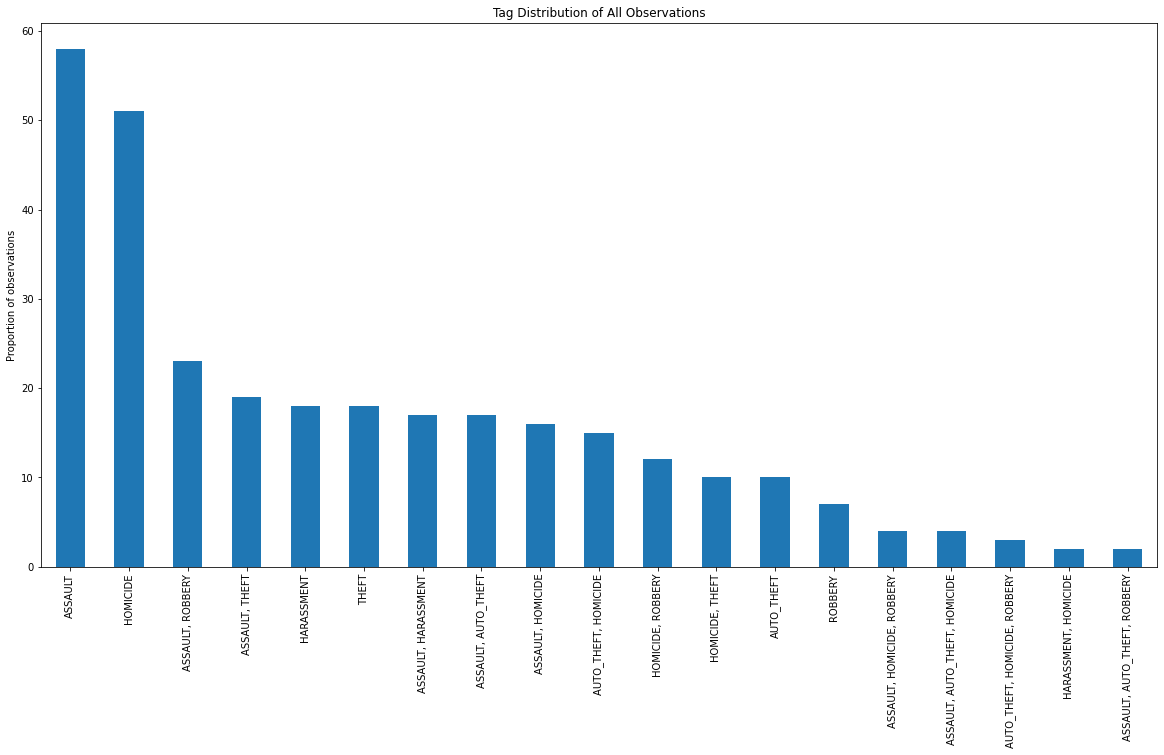

In [9]:
tag_dis = df_prep[df_prep['accept'].astype(str) != '[]']['accept'].apply(lambda x: ', '.join(sorted(tag for tag in x))).value_counts()
tag_dis.plot(
    kind='bar', 
    figsize=(20,10), 
    title='Tag Distribution of All Observations', 
    ylabel='Proportion of observations'
);

In [14]:
HOME_DIR = r'C:\ProjectX'

WORKSPACE_ROOT = os.path.join(HOME_DIR, 'workspace')
PATH_TO_PROJECT_X_REPO = os.path.join(WORKSPACE_ROOT, 'project_x')
PATH_TO_DATA_ROOT_DIR = os.path.join(WORKSPACE_ROOT, "data")
PATH_TO_SCRAPED_NEWS = os.path.join(PATH_TO_DATA_ROOT_DIR, "data_providers\gdelt\scraped_news")

# Add path to library to sys path
generic_utils_lib_dir = os.path.join(PATH_TO_PROJECT_X_REPO, 'common')

sys.path.extend([generic_utils_lib_dir])

#from generic_utils import (downcast_datatypes, timing, create_output_dir, parallelize)

from crime_mapper_utils import crimemapper, map_event_types_from_es_to_en

In [24]:
map_event_types_from_es_to_en[crimemapper(df_prep.loc[54, 'text'])]

'Homicide'

In [23]:
df_prep.loc[54, 'text']

'Many Oklahomans are honoring Tulsa Police Sergeant Craig Johnson, who was killed in the line of duty on June 30 two years ago. Sergeant Johnson was shot three times during a traffic stop. Johnson and officer Aurash Zarkeshan were trying to get David Ware out of his car, but he refused. When they tried to get Ware out of the car, he started shooting at them. Tulsa Police Department chief Wendell Franklin later awarded Sergeant Johnson with a purple heart. Some of Sergeant Johnson\'s former coworkers came together Thursday to remember his life and contributions to the Tulsa Police Department. Tulsa Police Sergeant Chris Butterfield said he was at the gym when he learned Sergeant Craig Johnson was shot. "I actually was here at 6 a.m. when I got the news, and like every other officer in Tulsa, I left and went right into work and started searching for the suspect," Butterfield said. Butterfield said he remembers Johnson as a team player. "He had a great reputation as being a really easy gu

In [22]:
mask = df_prep["HOMICIDE"] == 1

sample = df_prep[mask].sample(n=5)
sample

,text,accept,ASSAULT,AUTO_THEFT,HARASSMENT,HOMICIDE,ROBBERY,THEFT,CRIMINAL
54,Many Oklahomans are honoring Tulsa Police Serg...,[HOMICIDE],0,0,0,1,0,0,1
8,Donnell J. Dana and Kailie A. Brackett were bo...,"[HOMICIDE, ROBBERY]",0,0,0,1,1,0,1
582,Warning signs about the suspected Highland Par...,"[HOMICIDE, ASSAULT]",1,0,0,1,0,0,1
39,"Two people were shot, including a 13-year-old ...","[HOMICIDE, ASSAULT]",1,0,0,1,0,0,1
137,PHOENIX (AP) -- A suspect has been arrested in...,"[THEFT, HOMICIDE]",0,0,0,1,0,1,1


In [27]:
sample.text.to_list()[1]

'Coryell County authorities anticipate more arrests in the case of a Waco woman missing and presumed killed near Gatesville, Coryell County Sheriff Scott Williams said. Deputies arrested two Gatesville residents Aug. 23 and on charges related to the presumed death of Elizabeth Ann Romero, 44, of Waco, according to a statement from Williams on Thursday. Another Gatesville woman has been jailed on a murder charge in the case since May based on witness statements and forensic evidence, according to affidavits. She now faces charges of capital murder and tampering with or fabricating evidence. Romero went missing April 8 and has not been found, officials reported. Betsy Ayers Robinson, 57, of Gatesville, was arrested Aug. 23 on charges of murder and tampering with evidence and remained in Coryell County Jail on Tuesday with bail set at more than $1 million. Cody Gene Ayers, 42, of Gatesville, was arrested Aug. 23 on a charge of tampering with evidence and was released a day later after pos

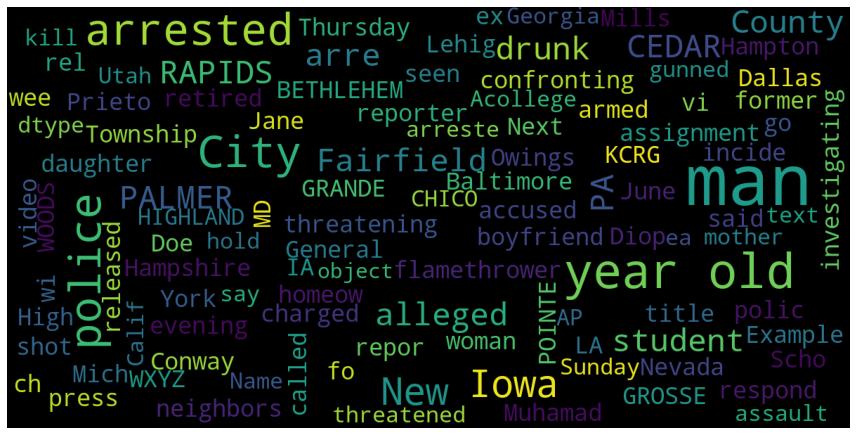

In [12]:
plot_wordcloud(df_prep[df_prep['HARASSMENT'] == 1]['text'])

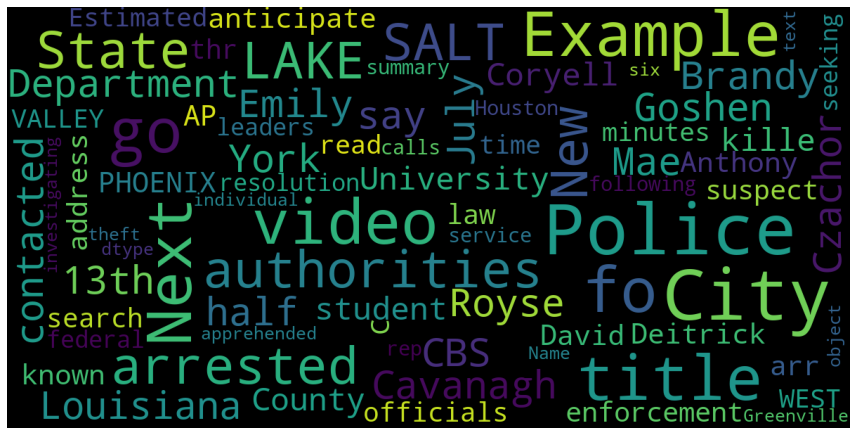

In [13]:
plot_wordcloud(df_prep[df_prep['THEFT'] == 1]['text'])

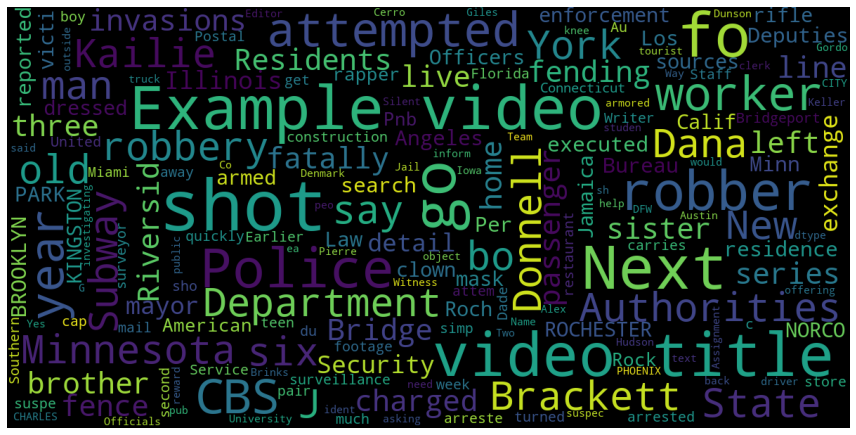

In [14]:
plot_wordcloud(df_prep[df_prep['ROBBERY'] == 1]['text'])

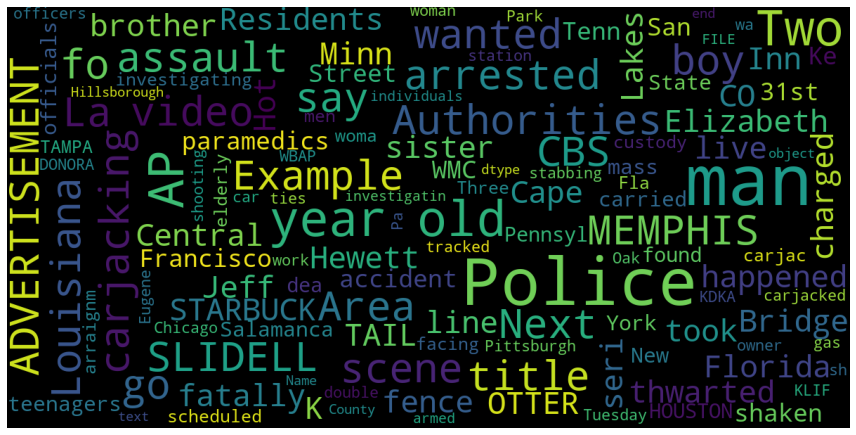

In [15]:
plot_wordcloud(df_prep[df_prep['AUTO_THEFT'] == 1]['text'])

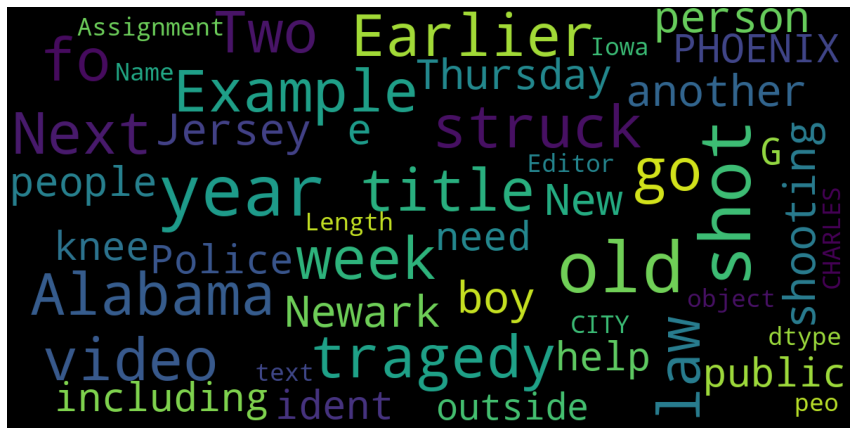

In [16]:
plot_wordcloud(df_prep[df_prep['ASSAULT'] == 1]['text'])

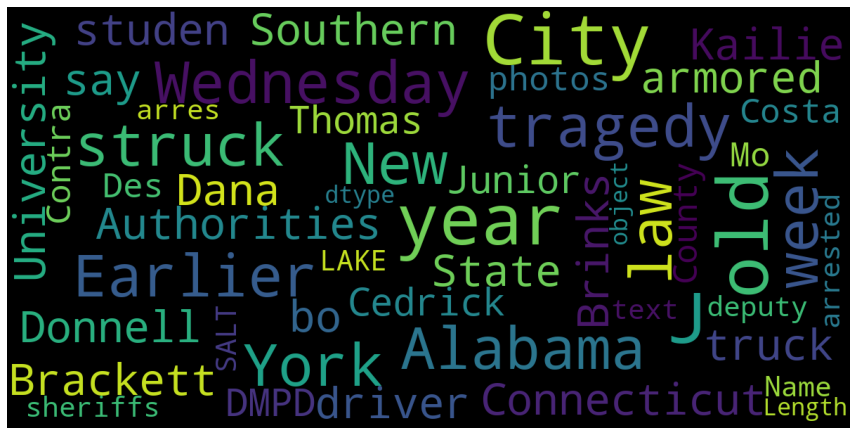

In [17]:
plot_wordcloud(df_prep[df_prep['HOMICIDE'] == 1]['text'])